In [1]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_data=pd.read_csv('titanic_data.csv')

In [3]:
total_number=len(titanic_data['Name'].unique())


In [4]:
titanic_data.head(3)
#数据探索
#问题：在泰坦尼克事件里，哪些因素影响了生还率？
#1.女性的生还率是否比男性高？
#2.三等舱的生还率是否小于一等舱，二等舱的生还率？
#3.上岸港口是否对生还率有影响？
#4.年龄对生还率是否有影响？



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#数据整理
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#用平均值填充年龄缺失值
titanic_data.Age.fillna(titanic_data.Age.mean(),inplace=True)

In [8]:
#用众数填充上岸港口的缺失值
titanic_data.Embarked.fillna("S",inplace=True)

In [9]:
total_survived_num=titanic_data['Survived'].sum()
total_no_survived_num=891-titanic_data['Survived'].sum()

print'生还者{}人，{}人未生还。'.format(total_survived_num,total_no_survived_num)


生还者342人，549人未生还。


<function matplotlib.pyplot.show>

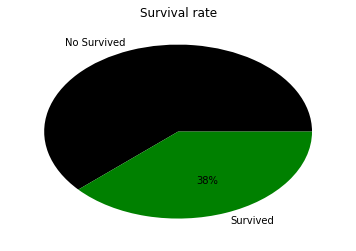

In [10]:
plt.pie([total_no_survived_num,total_survived_num],labels=['No Survived',
         'Survived'],autopct='%1.0f%%',colors=['black','green'])
plt.title('Survival rate')
plt.show

In [11]:
#多个特征变量分组的生化率
def plotRate(feature):
    survived_rate = (titanic_data.groupby([feature]).sum()/titanic_data.groupby([feature]).count())['Survived']
    survived_rate.plot(kind='bar')
    plt.title('Rate of Survived Passenger by{}'.format(feature))
    

In [12]:
def number(feature):
    print"Count of passengers across"+feature+":"
    print(titanic_data.groupby(feature)['Survived'].count())
    print"Count of Survived passengers across"+feature+":"
    print(titanic_data.groupby(feature)['Survived'].sum())
    print"Rate of Survived passengers across"+feature+":"
    print(titanic_data.groupby(feature)['Survived'].mean())

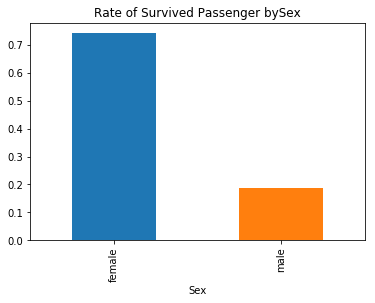

In [13]:
#问题１：女性比男性的生还率更高么？
plotRate('Sex')
#女性生还率约74%，男性生还率为19%。女性比男性的生还率高。

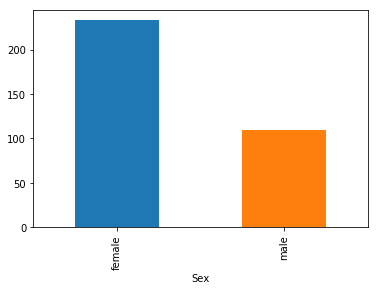

In [14]:
titanic_data.groupby('Sex').Survived.sum().plot(kind='bar')
#女性的生还人数比男性多。

In [15]:
number('Sex')
#print(titanic_data.Sex.value_counts())#在泰坦尼克的男性和女性人数
#print(titanic_data.groupby('Sex')['Survived'].sum())＃女性和男性生还人数
#print(titanic_data.groupby('Sex')['Survived'].mean())#男性，女性生还率
#结论：1.乘坐泰坦尼克的女性314人，男性577人。
#     2.女性生还人数233人，男性109人。
#     3.女性的生化率更高74%，男性为19%。
#     泰坦尼克事件中，女性的生还率比男性高。

Count of passengers acrossSex:
Sex
female    314
male      577
Name: Survived, dtype: int64
Count of Survived passengers acrossSex:
Sex
female    233
male      109
Name: Survived, dtype: int64
Rate of Survived passengers acrossSex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


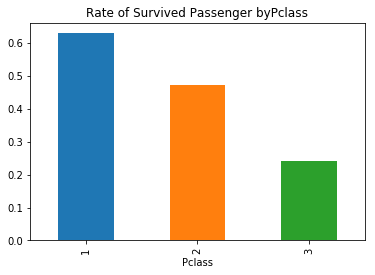

In [16]:
#问题２：三等舱的生还率是否小于一等舱，二等舱的生还率？
#titanic_data.groupby('Pclass').Survived.sum().plot(kind='bar')
plotRate('Pclass')
#一等舱位生还率最高，二等次之，三等生最少。

In [17]:
number('Pclass')
#结论：1.乘坐泰坦尼克的一等舱216人，二等舱184人，三等舱491人。
#    2.生还人数：一等舱136人，二等舱87人，三等舱119人。
#    3.生还率：一等舱63%，二等舱47%，三等舱24%。
#    一等舱位生还率略高，二等次之，三等生最少。

Count of passengers acrossPclass:
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Count of Survived passengers acrossPclass:
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Rate of Survived passengers acrossPclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


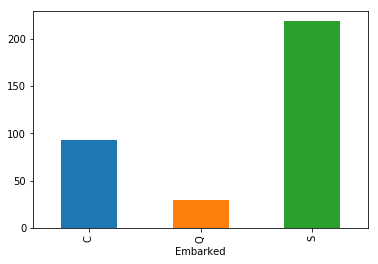

In [18]:
#问题3：上岸港口与生还人数有影响么？
titanic_data.groupby('Embarked').Survived.sum().plot(kind='bar')
#生还人数中，S港口的生还人数最多，Q港口的最少。

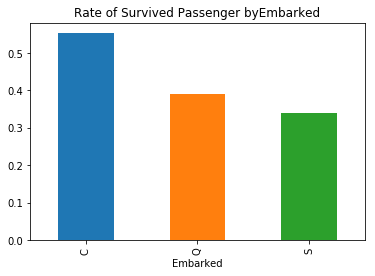

In [19]:
plotRate('Embarked')
#生还率，Ｃ港口的生还率最高，Ｓ港口的最低

In [20]:
number('Embarked')
#结论：C案口生还率55%，Q岸口生还率39%，S岸口生还率34%。
#上岸港口，对生还率仅有轻微影响。可能有其他因素对生还率有共同的相关性。

Count of passengers acrossEmbarked:
Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64
Count of Survived passengers acrossEmbarked:
Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64
Rate of Survived passengers acrossEmbarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


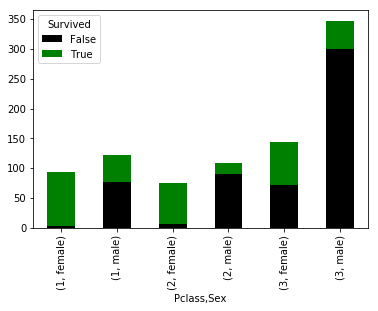

In [21]:
#比较不同的舱位等级，性别和生还率的关系。
death_counts=pd.crosstab([titanic_data.Pclass,titanic_data.Sex],titanic_data.Survived.astype(bool))
                                                                                             
                
death_counts.plot(kind='bar',stacked=True,color=['black','green'],grid=False)

#结论：1.女性的生还率比男性的高。
#     2.三等舱位的生还率远远小于一等和二等舱位的。
#     3.三等舱位的男性生还率最低，相比而言，三等舱位的女性在三等舱极低的生还率下，得到较多帮助，生还率还好。

    
     

In [22]:
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

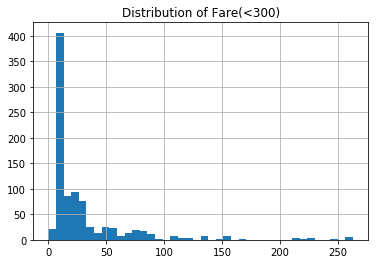

In [23]:
#票价分布的直方图
titanic_data[titanic_data.Fare<300]['Fare'].hist(bins=40)
plt.title("Distribution of Fare(<300)")

In [24]:
#将年龄连续变量切割为类别变量。
bins=np.arange(0,90,10)

titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins)

print titanic_data.groupby('Age_group').PassengerId.count()

Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: PassengerId, dtype: int64


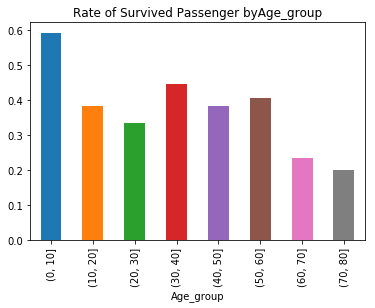

In [25]:
plotRate('Age_group')

In [26]:
number('Age_group')

Count of passengers acrossAge_group:
Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    407
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Survived, dtype: int64
Count of Survived passengers acrossAge_group:
Age_group
(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
Name: Survived, dtype: int64
Rate of Survived passengers acrossAge_group:
Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


In [27]:
#按照年龄，将乘客分为儿童，少年，成年人和老人
children_df = titanic_data[ titanic_data['Age'] <= 12]
juvenile_df = titanic_data[(titanic_data['Age'] > 12) & (titanic_data['Age'] < 18)]
adults_df = titanic_data[(titanic_data['Age'] >= 18) & (titanic_data['Age'] < 65)]
agedness_df = titanic_data[titanic_data['Age'] >= 65]

In [28]:
# 各年龄段生还人数
children_survived_sum = children_df['Survived'].sum()
juvenile_survived_sum = juvenile_df['Survived'].sum()
adults_survived_sum = adults_df['Survived'].sum()
agedness_survived_sum = agedness_df['Survived'].sum()
print "Children_survived_sum:" 
print children_survived_sum
print "Juvenile_survived_sum:"
print juvenile_survived_sum
print "Adults_survived_sum:"
print adults_survived_sum
print "Agedness_survived_sum:"
print agedness_survived_sum

Children_survived_sum:
40
Juvenile_survived_sum:
21
Adults_survived_sum:
280
Agedness_survived_sum:
1


In [29]:
# 各年龄段生还率
children_survived_rate = children_df["Survived"].mean()
juvenile_survived_rate = juvenile_df['Survived'].mean()
adults_survived_rate = adults_df['Survived'].mean()
agedness_survived_rate = agedness_df['Survived'].mean()
print "children_survived_rate:"
print children_survived_rate
print "Juvenile_survived_rate:"
print juvenile_survived_rate
print "Adults_survived_rate："
print adults_survived_rate
print "Agedness_survived_rate:"
print agedness_survived_rate

children_survived_rate:
0.579710144928
Juvenile_survived_rate:
0.477272727273
Adults_survived_rate：
0.365058670143
Agedness_survived_rate:
0.0909090909091


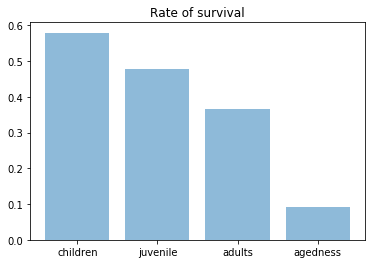

In [30]:
types=('children','juvenile','adults','agedness')
y_pos=np.arange(len(types))
performance=[children_survived_rate,juvenile_survived_rate,adults_survived_rate,agedness_survived_rate]

plt.bar(y_pos,performance,align='center',alpha=0.5)
plt.xticks(y_pos,types)
plt.title('Rate of survival')

数据分析总结
1.泰坦尼克中，生还者342人，549人未生还。生还率38%。

2.泰坦尼克事件中，女性的生还率比男性高。乘坐泰坦尼克的女性314人，男性577人。女性生还人数233人，男性109人。女性的生化率更高74%，男性为19%。女性的生还率比男性高,遵循“女士优先”的原则。

3.客舱等级越高，生还率越高。乘坐泰坦尼克的一等舱216人，二等舱184人，三等舱491人。
生还人数：一等舱136人，二等舱87人，三等舱119人。生还率：一等舱63%，二等舱47%，三等舱24%。一等舱位生还率最高，二等次之，三等生最少。

4.结论：C案口生还率55%，Q岸口生还率39%，S岸口生还率34%。
上岸港口，对生还率仅有轻微影响。

5.儿童（<12岁）的生化率最高58%，少年（12-18岁）次之48%，老年最低9%。


分析限制讨论：
1.在泰坦尼克事件中，2224名船员及乘客中，逾1500人丧生。报告中使用样本乘客数据为891人。
若是随机选取样本，样本足够大，符合中心极值定理，可以支撑得到准确的结论。

2.数据集的年龄的缺失值用平均数来处理。

3.除了报告中涉及的变量，是否为船员，乘客的家庭身份（是否为父亲母亲）等变量可能与存活率有关。